#**Data analysis Domestic violence**
-----------------------
##This notebook analyzes business crises, emergency situations in a context of domestic violence.

-----------------------
#####**objetive**

Apply concepts of probability distributions to model certain aspects of the crisis. For example, modeling the distribution of financial losses. Luego, use statistical inference techniques to draw conclusions about the crisis.

#####**DataSets**

- Reporte Delito Violencia Intrafamiliar Policía Nacional | Datos Abiertos Colombia
    https://www.datos.gov.co/Seguridad-y-Defensa/Reporte-Delito-Violencia-Intrafamiliar-Polic-a-Nac/vuyt-mqpw/about_data

- Tasa de Violencia intrafamiliar en Bogotá D.C.
    https://datosabiertos.bogota.gov.co/dataset/numero-de-casos-de-violencia-intrafamiliar

- 

#####**Importing necessary libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from seaborn import heatmap, set_theme 
from scipy import stats
import seaborn as sns # Visualización de datos en conjunto con matplotlib
import plotly.express as px
import os

In [1130]:
#variables
report = r'Files\violencia_intrafamiliar.csv'
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
color_map = {'MASCULINO': 'blue', 'FEMENINO': 'red', 'NO REPORTA': 'green'}
# Graph Colors
colores = {
    'Mujeres': 'red',
    'Hombres': 'blue',
    'No Reportado': 'green'
}
# Configuración de Temas y Estilos
set_theme(style="ticks", context="talk", palette="tab10")
plt.rcParams.update({'font.size': 12})

In [1131]:
# Data reading
df = pd.read_csv(report,sep=',')
ruta_absoluta = os.path.abspath(report)
print(ruta_absoluta)
print("Data Violencia Domestica Colombia")
print(df.dtypes)

c:\Users\ALEXANDER\Documents\Especializacion\Tratamiento_y_analitica_datos\Tarea1\Codigo\Analitica_datos\Files\violencia_intrafamiliar.csv
Data Violencia Domestica Colombia
DEPARTAMENTO    object
MUNICIPIO       object
CODIGO DANE     object
ARMAS MEDIOS    object
FECHA HECHO     object
GENERO          object
GRUPO ETARIO    object
CANTIDAD         int64
dtype: object


C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_14676\3850158783.py:2: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [1132]:
# Eliminamos Codigo Dane de la Base ya que no lo necesitamos
df =df.drop('CODIGO DANE',axis=1).copy() 
print(df.head(5))

   DEPARTAMENTO          MUNICIPIO                 ARMAS MEDIOS FECHA HECHO  \
0     ATLÁNTICO  BARRANQUILLA (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
1        BOYACÁ            DUITAMA  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
2       CAQUETÁ        PUERTO RICO  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
3      CASANARE               MANÍ  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   
4  CUNDINAMARCA   BOGOTÁ D.C. (CT)  ARMA BLANCA / CORTOPUNZANTE   1/01/2010   

      GENERO GRUPO ETARIO  CANTIDAD  
0  MASCULINO      ADULTOS         1  
1   FEMENINO      ADULTOS         1  
2  MASCULINO      ADULTOS         1  
3   FEMENINO      ADULTOS         1  
4   FEMENINO      ADULTOS         1  


In [1133]:
# Identify null values
info_vacia = df.isnull().sum() * 100 / df.shape[0]

# porcentaje y  cantidad total de valores nulos
print(f'{info_vacia}\n\n{df.isnull().sum()}')


DEPARTAMENTO    0.000000
MUNICIPIO       0.000000
ARMAS MEDIOS    0.000000
FECHA HECHO     0.000000
GENERO          0.000000
GRUPO ETARIO    0.240257
CANTIDAD        0.000000
dtype: float64

DEPARTAMENTO       0
MUNICIPIO          0
ARMAS MEDIOS       0
FECHA HECHO        0
GENERO             0
GRUPO ETARIO    1611
CANTIDAD           0
dtype: int64


In [1134]:
#Normalizing Data
df['GENERO']=df['GENERO'].astype(str)
df['GRUPO ETARIO']=df['GRUPO ETARIO'].astype(str)
df['ARMAS MEDIOS']=df['ARMAS MEDIOS'].astype(str)
df['CANTIDAD']=pd.to_numeric(df['CANTIDAD'],errors='coerce')
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'], dayfirst=True, errors='coerce')
df['AÑO'] = df['FECHA HECHO'].dt.year
# Cambio de genero - No reporta
df['GENERO'] = df['GENERO'].replace('NO REPORTADO', 'NO REPORTA')

# Cambio de Grupo Etario - No Reporta
df['GRUPO ETARIO'] = df['GRUPO ETARIO'].replace('NO REPORTADO', 'NO REPORTA')

# Cambio de tipo de Arma - Segun codigo penal
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'ARMA BLANCA / CORTOPUNZANTE':'ARMA BLANCA','-':'NO REPORTA','NO REPORTADO':'NO REPORTA','CORTOPUNZANTES':'ARMA BLANCA','CORTANTES':'ARMA BLANCA','CONTUNDENTES':'ARMA BLANCA','PUNZANTES':'ARMA BLANCA'})

# Convertir la columna 'FECHA HECHO' a formato datetime
df['FECHA HECHO'] = pd.to_datetime(df['FECHA HECHO'])

# Crear columnas con el nombre del día y el mes
df['DIA'] = df['FECHA HECHO'].dt.day_name()
df['MES'] = df['FECHA HECHO'].dt.month_name()

#Eliminación de valores nulos de la columna Grupo Etario
df = df[~df['GRUPO ETARIO'].isnull()]
df = df.loc[:, ~df.columns.duplicated()].copy()

In [1135]:
print(df['GENERO'].unique())
print(df['GRUPO ETARIO'].unique())
print(df['ARMAS MEDIOS'].unique())

['MASCULINO' 'FEMENINO' 'NO REPORTA' '-']
['ADULTOS' 'ADOLESCENTES' 'MENORES' 'NO REPORTA' 'nan']
['ARMA BLANCA' 'ARMA DE FUEGO' 'NO REPORTA' 'SIN EMPLEO DE ARMAS'
 'ESCOPOLAMINA']


###Medidas de tendencia Central y dispersión y Datos representativos en el espacio muestral

In [1136]:
# media y desviación estánda
media_cantidad = df['CANTIDAD'].mean()
desviacion_estandar_cantidad = df['CANTIDAD'].std()

print(f"Media: {media_cantidad}")
print(f"Desviación estándar: {desviacion_estandar_cantidad}")

Media: 1.8575146301742498
Desviación estándar: 4.144574686628082


In [1137]:
#definición de umbrales
umbral_inferior = max(media_cantidad - 3 * desviacion_estandar_cantidad,0)
umbral_superior = media_cantidad + 3 * desviacion_estandar_cantidad

print(f"Umbrales: {umbral_inferior} a {umbral_superior}")
# Filtrar el DataFrame para excluir los valores atípicos en CANTIDAD
df_sin_atipicos = df[(df['CANTIDAD'] >= umbral_inferior) & (df['CANTIDAD'] <= umbral_superior)]

Umbrales: 0 a 14.291238690058496


In [1138]:
# DataFrames para los valores normales y los atípicos
df_sin_atipicos = df[(df['CANTIDAD'] >= umbral_inferior) & (df['CANTIDAD'] <= umbral_superior)]
df_atipicos = df[(df['CANTIDAD'] < umbral_inferior) | (df['CANTIDAD'] > umbral_superior)]

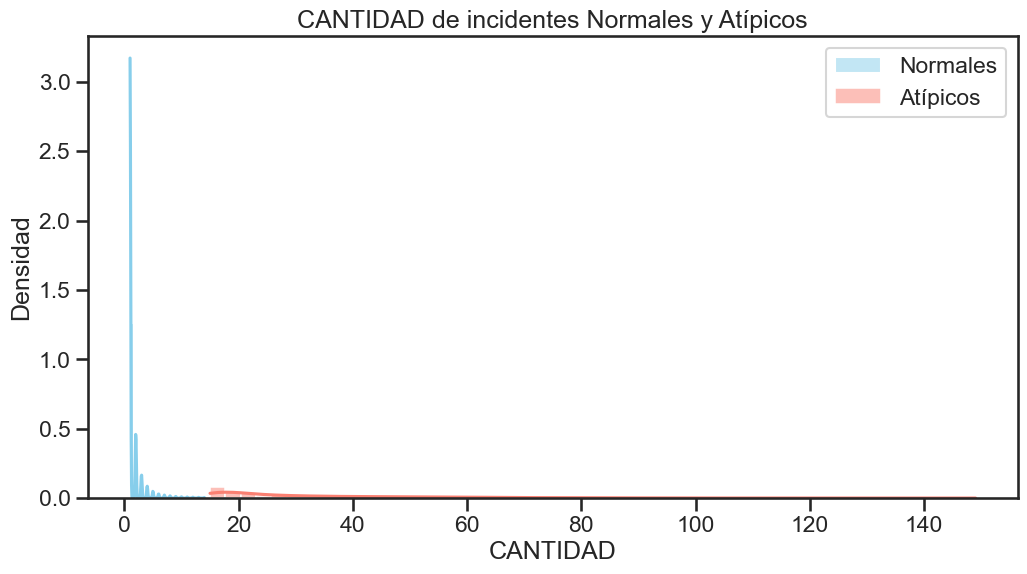

In [1139]:
# Graph
plt.figure(figsize=(12, 6))

# Histogram
sns.histplot(df_sin_atipicos['CANTIDAD'], color="skyblue", kde=True, label="Normales", stat="density")
sns.histplot(df_atipicos['CANTIDAD'], color="salmon", kde=True, label="Atípicos", stat="density")

# Properties
plt.title("CANTIDAD de incidentes Normales y Atípicos")
plt.xlabel("CANTIDAD")
plt.ylabel("Densidad")
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  
plt.show()


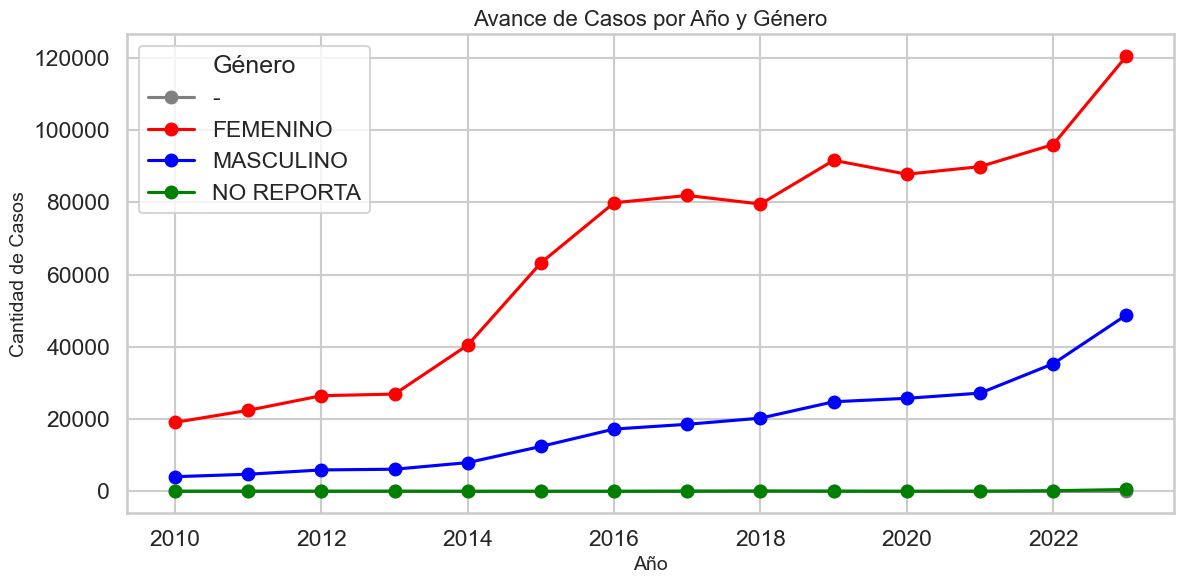

In [1140]:
df_generos = df[df['GENERO'] != 'NO REPORTA']
df_generos = df[df['AÑO'] < 2024]

# Agrupar por 'AÑO' y 'GENERO' y sumar la 'CANTIDAD'
grupo = df_generos.groupby(['AÑO', 'GENERO'])['CANTIDAD'].sum().reset_index()
tabla_pivot = grupo.pivot(index='AÑO', columns='GENERO', values='CANTIDAD').fillna(0)
generos_presentes = tabla_pivot.columns.tolist()

# Graph Style
sns.set_style("whitegrid")

# Line Graph
plt.figure(figsize=(12, 6))

for genero in generos_presentes:
    plt.plot(tabla_pivot.index, tabla_pivot[genero], label=genero, color=color_map.get(genero, 'gray'), marker='o')

# Properties
plt.title('Avance de Casos por Año y Género', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Cantidad de Casos', fontsize=14)
plt.legend(title='Género')

# Show Graph
plt.tight_layout()
plt.show()

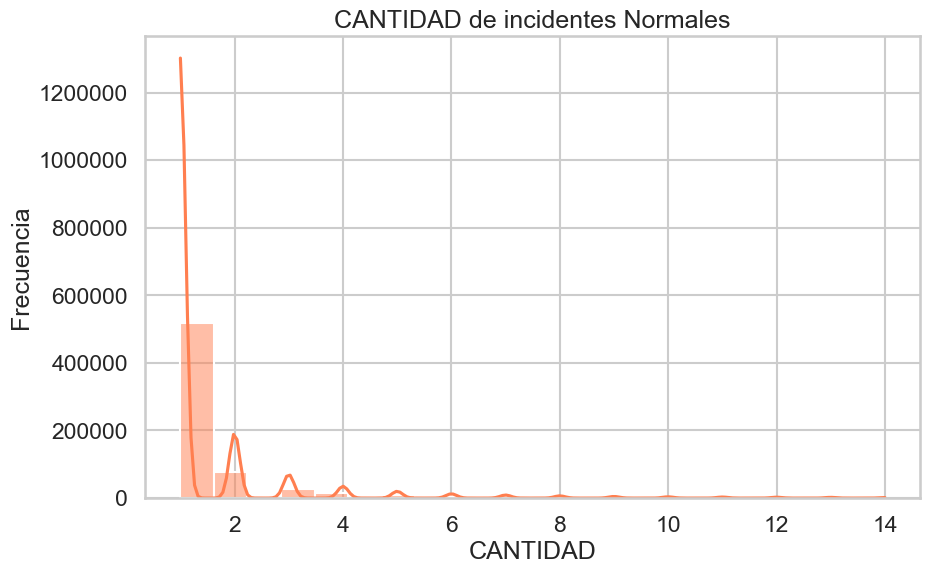

In [1141]:
plt.figure(figsize=(10, 6))
sns.histplot(df_sin_atipicos['CANTIDAD'], kde=True, color="coral")

plt.title("CANTIDAD de incidentes Normales")
plt.xlabel("CANTIDAD")
plt.ylabel("Frecuencia")
plt.ticklabel_format(style='plain', axis='y')  # Muestra números completos en el eje Y

plt.show()

Tratamiento de Valores atipicos

Este cambio se basa en el analisis de la variable Cantidad de la data trabaja

Dado que cada fila del conjuto de datos reprenta un unico registro, se considera oprtuno eliminar los registros con casos superiores a 20, debido a que es absurdo pensar  que se haya notificado un unico incidente de violencia domestica com mas de 20 victimas en el mismo lugar. Esto podria deberse a un error de introducción de datos, ya que hay casos que superan los 100

In [1142]:
 # Filtrar filas donde 'CANTIDAD' es atipico, mayor al umbral superior
df_filtered = df[df['CANTIDAD'] > umbral_superior]
# Cantidad de filas sobre el umbral 
count = df_filtered['CANTIDAD'].count()  
print(count)

7164


Prueba de Hipotesis
H0: El tipo de arma no influye significativamente en la cantidad de casos.
H1: El tipo de arma tiene un efecto significativo en la cantidad de casos reportados.

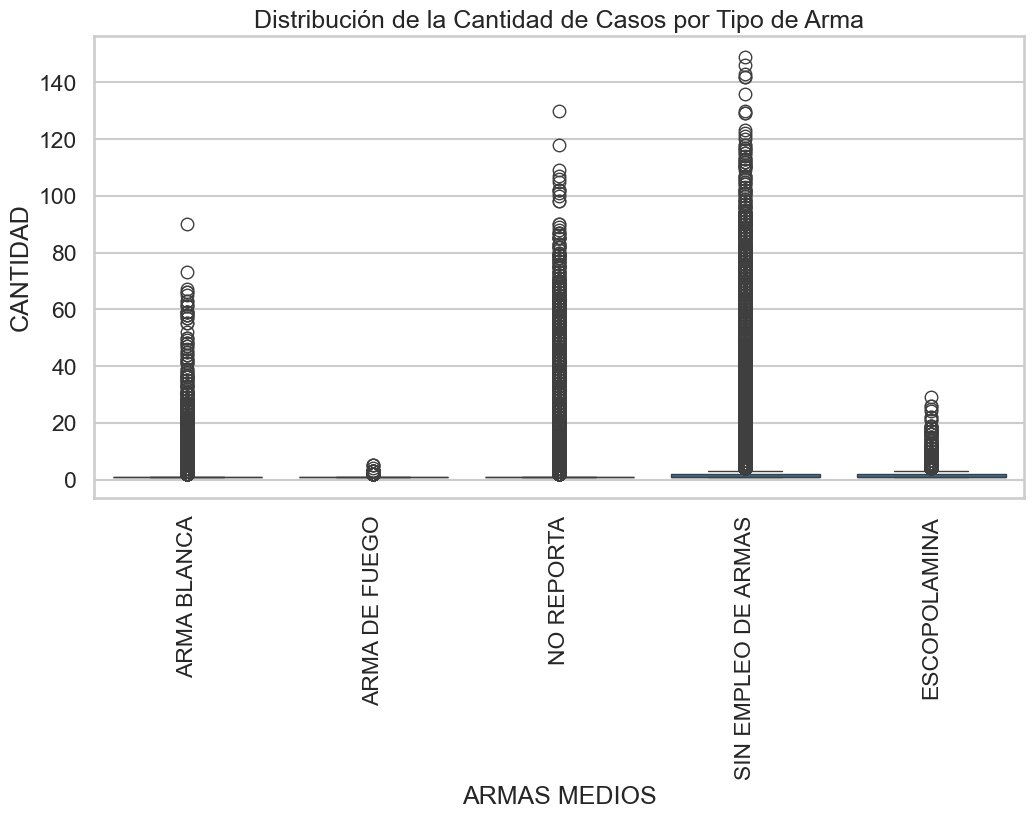

In [1143]:
# Visualización de la distribución de casos por tipo de arma - (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='ARMAS MEDIOS', y='CANTIDAD', data=df)
plt.title('Distribución de la Cantidad de Casos por Tipo de Arma')
plt.xticks(rotation=90)
plt.show()

In [1144]:
# Agrupar los datos por tipo de arma y convertirlos a listas para ANOVA
arma_grupos = [grupo['CANTIDAD'].values for nombre, grupo in df.groupby('ARMAS MEDIOS')]

# Prueba ANOVA de una vía
f_stat, p_value = stats.f_oneway(*arma_grupos)
print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')
alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula (H0): El tipo de arma tiene un efecto significativo en la cantidad de casos reportados.")
else:
    print("No podemos rechazar la hipótesis nula (H0): El tipo de arma no influye significativamente en la cantidad de casos.")

Estadístico F: 1532.2621503690414
Valor p: 0.0
Rechazamos la hipótesis nula (H0): El tipo de arma tiene un efecto significativo en la cantidad de casos reportados.


#### Interpretación de los resultados 
- Si el valor p es menor que el nivel de significancia (α = 0.05), se rechaza la hipótesis nula, indicando que el tipo de arma tiene un efecto significativo en la cantidad de casos.
- Si el valor p es mayor que α, no se puede rechazar la hipótesis nula, lo que sugiere que no hay suficiente evidencia para afirmar que el tipo de arma influye en la cantidad de casos. Esto implica que hay diferencias significativas en la cantidad de casos entre al menos dos tipos de armas.

#### EDA (Exploratory Data Analysis)

Distribucción de columnas
- Podemos ver que en 2020 tuvo un gran aumento de casos, y se tiene una gran concentración de casos de 1 a 2 casos por fila 

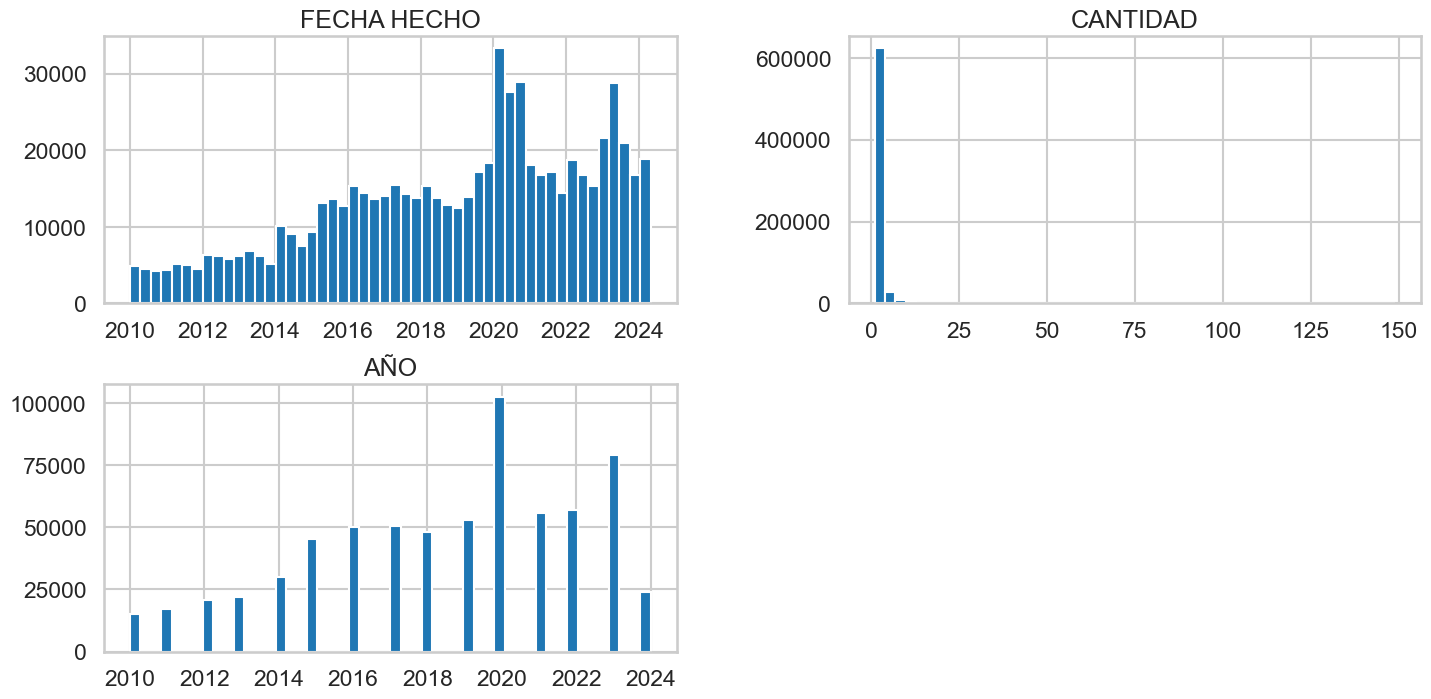

In [1145]:
df.hist(figsize=(17, 8), bins=50) # histograma
plt.show()


Visualización de Datos

In [1146]:
print("Resumen estadístico de variables numéricas:")
print(df.describe())

print("\nResumen estadístico de variables categóricas:")
print(df.describe(include='object'))

print("\nResumen estadístico de todas las variables:") # (numéricas y categóricas)
print(df.describe(include='all'))

Resumen estadístico de variables numéricas:
                         FECHA HECHO       CANTIDAD            AÑO
count                         670532  670532.000000  670532.000000
mean   2018-12-03 19:06:12.921799424       1.857515    2018.463994
min              2010-01-01 00:00:00       1.000000    2010.000000
25%              2016-04-29 00:00:00       1.000000    2016.000000
50%              2019-09-13 00:00:00       1.000000    2019.000000
75%              2021-11-01 00:00:00       1.000000    2021.000000
max              2024-04-30 00:00:00     149.000000    2024.000000
std                              NaN       4.144575       3.627424

Resumen estadístico de variables categóricas:
        DEPARTAMENTO         MUNICIPIO ARMAS MEDIOS    GENERO GRUPO ETARIO  \
count         670532            670532       670532    670532       670532   
unique            34              2027            5         4            5   
top     CUNDINAMARCA  BOGOTÁ D.C. (CT)  ARMA BLANCA  FEMENINO      ADULT

In [1147]:
df.describe(exclude='datetime') # Resumen estadistico 

,DEPARTAMENTO,MUNICIPIO,ARMAS MEDIOS,GENERO,GRUPO ETARIO,CANTIDAD,AÑO,DIA,MES
count,670532,670532,670532,670532,670532,670532.000000,670532.000000,670532,670532
unique,34,2027,5,4,5,NaN,NaN,7,12
top,CUNDINAMARCA,BOGOTÁ D.C. (CT),ARMA BLANCA,FEMENINO,ADULTOS,NaN,NaN,Sunday,January
freq,120385,58103,350267,505169,583964,NaN,NaN,123955,68532
mean,NaN,NaN,NaN,NaN,NaN,1.857515,2018.463994,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,4.144575,3.627424,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,1.000000,2010.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.000000,2016.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,1.000000,2019.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.000000,2021.000000,NaN,NaN


In [1148]:
# ¿Que departamentos tiene mas casos y como se distribuyen?
tabla_departamento = pd.pivot_table(df, index = ('DEPARTAMENTO'), values = 'CANTIDAD', columns = None, aggfunc='count').reset_index()
tabla_departamento.sort_values(by='CANTIDAD', ascending=False)

,DEPARTAMENTO,CANTIDAD
12,CUNDINAMARCA,120385
1,ANTIOQUIA,83966
31,VALLE,62145
28,SANTANDER,51175
5,BOYACÁ,38134
30,TOLIMA,25156
3,ATLÁNTICO,25037
4,BOLÍVAR,22990
17,HUILA,22615
19,META,22467


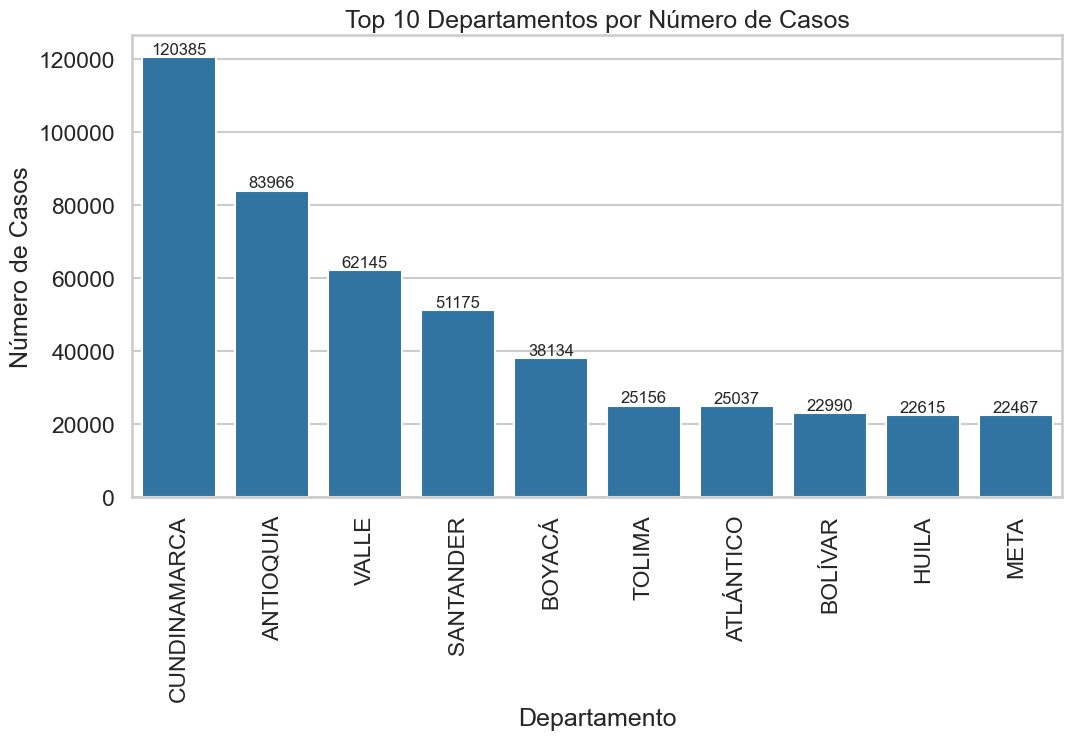

In [1149]:
count_depart = df['DEPARTAMENTO'].value_counts()
top_10 = count_depart.nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values)
ax.set_title('Top 10 Departamentos por Número de Casos')
ax.set_xlabel('Departamento')
ax.set_ylabel('Número de Casos')
plt.xticks(rotation=90)
# Agregar etiquetas con el número de casos encima de cada barra
ax.bar_label(ax.containers[0])
plt.show()

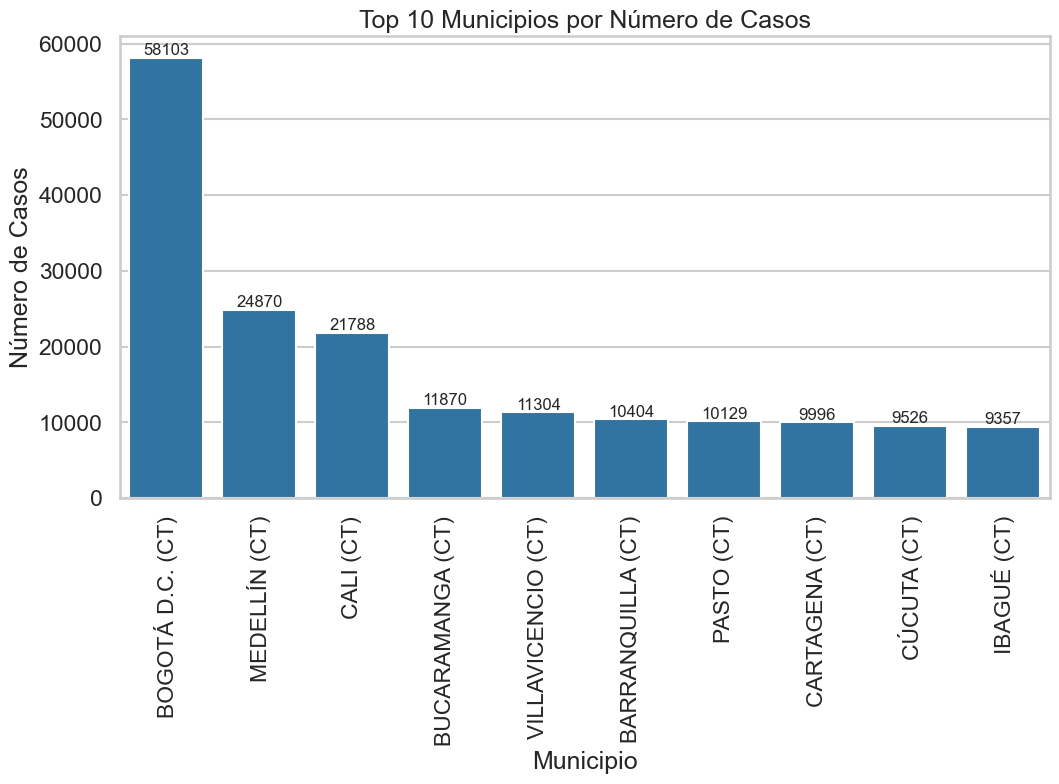

In [1150]:
count_municipio = df['MUNICIPIO'].value_counts()
top_10 = count_municipio.nlargest(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=top_10.index, y=top_10.values)
ax.set_title('Top 10 Municipios por Número de Casos')
ax.set_xlabel('Municipio')
ax.set_ylabel('Número de Casos')
plt.xticks(rotation=90)

# Agregar etiquetas con el número de casos encima de cada barra
ax.bar_label(ax.containers[0])

plt.show()


Que tipo de arma es la mas comun : las armas mas utilizadas en los casos de violencia intrafamiliar en Colombia es el arma blanca, seguido del no uso de armas. 

In [1151]:
df['ARMAS MEDIOS'] = df['ARMAS MEDIOS'].replace({'ARMA BLANCA / CORTOPUNZANTE':'ARMA BLANCA','-':'NO REPORTA','NO REPORTADO':'NO REPORTA','CORTOPUNZANTES':'ARMA BLANCA','CORTANTES':'ARMA BLANCA','CONTUNDENTES':'ARMA BLANCA','PUNZANTES':'ARMA BLANCA'})

# tabla dinámica para contar el número de casos por tipo de arma
tipo_de_arma = pd.pivot_table(df, index='ARMAS MEDIOS', values='CANTIDAD', aggfunc='count').reset_index()

# Ordenar la tabla por la columna 'CANTIDAD' en orden descendente
tipo_de_arma.sort_values(by='CANTIDAD', ascending=False, inplace=True)

# Mostrar la tabla
print(tipo_de_arma)

          ARMAS MEDIOS  CANTIDAD
0          ARMA BLANCA    350267
4  SIN EMPLEO DE ARMAS    237096
3           NO REPORTA     76357
2         ESCOPOLAMINA      3863
1        ARMA DE FUEGO      2949


In [1152]:
print(tipo_de_arma.head())

# Crear un gráfico de barras con Plotly
tipo_de_arma_graph = px.bar(
    tipo_de_arma,  # DataFrame que contiene los datos
    x='ARMAS MEDIOS',  
    y='CANTIDAD',  
    text_auto='.2s',  
    title='Tipo de Armas Usadas'
)

# Actualizar el trazado para personalizar el texto
tipo_de_arma_graph.update_traces(
    textfont_size=12,  
    textangle=0,  
    textposition="outside",  # texto fuera de las barras
    cliponaxis=False  # Permite que el texto sobresalga fuera del eje
)

# Mostrar el gráfico
tipo_de_arma_graph.show()
tipo_de_arma_graph.write_html('graphics/weapon.html') #usado para crear el grafico

 

          ARMAS MEDIOS  CANTIDAD
0          ARMA BLANCA    350267
4  SIN EMPLEO DE ARMAS    237096
3           NO REPORTA     76357
2         ESCOPOLAMINA      3863
1        ARMA DE FUEGO      2949


Genero

In [1153]:
# Agrupar por 'GENERO' y contar la cantidad de ocurrencias en la columna 'CANTIDAD'
casos_por_genero = df.groupby('GENERO')['CANTIDAD'].count()

# Mostrar el resultado
print(casos_por_genero)


GENERO
-                  7
FEMENINO      505169
MASCULINO     164107
NO REPORTA      1249
Name: CANTIDAD, dtype: int64


In [1154]:
# Crear la tabla dinámica
df_genero_armas = pd.pivot_table(
    df, 
    index=('GENERO', 'ARMAS MEDIOS'),  # Agrupar por 'GENERO' y 'ARMAS MEDIOS'
    values='CANTIDAD',
    aggfunc='count'
).reset_index()

# Mostrar el resultado
print(df_genero_armas)


        GENERO         ARMAS MEDIOS  CANTIDAD
0            -          ARMA BLANCA         4
1            -  SIN EMPLEO DE ARMAS         3
2     FEMENINO          ARMA BLANCA    268614
3     FEMENINO        ARMA DE FUEGO      2470
4     FEMENINO         ESCOPOLAMINA      2984
5     FEMENINO           NO REPORTA     57046
6     FEMENINO  SIN EMPLEO DE ARMAS    174055
7    MASCULINO          ARMA BLANCA     81462
8    MASCULINO        ARMA DE FUEGO       479
9    MASCULINO         ESCOPOLAMINA       877
10   MASCULINO           NO REPORTA     19203
11   MASCULINO  SIN EMPLEO DE ARMAS     62086
12  NO REPORTA          ARMA BLANCA       187
13  NO REPORTA         ESCOPOLAMINA         2
14  NO REPORTA           NO REPORTA       108
15  NO REPORTA  SIN EMPLEO DE ARMAS       952


In [1155]:
# Reemplazar el valor 'NO REPORTA' por NaN en la columna 'GENERO'
df_genero_armas['GENERO'] = df_genero_armas['GENERO'].replace({'NO REPORTA': pd.NA})
# Eliminar filas NaN
df_genero_armas = df_genero_armas[~df_genero_armas['GENERO'].isnull()]

print(df_genero_armas)

       GENERO         ARMAS MEDIOS  CANTIDAD
0           -          ARMA BLANCA         4
1           -  SIN EMPLEO DE ARMAS         3
2    FEMENINO          ARMA BLANCA    268614
3    FEMENINO        ARMA DE FUEGO      2470
4    FEMENINO         ESCOPOLAMINA      2984
5    FEMENINO           NO REPORTA     57046
6    FEMENINO  SIN EMPLEO DE ARMAS    174055
7   MASCULINO          ARMA BLANCA     81462
8   MASCULINO        ARMA DE FUEGO       479
9   MASCULINO         ESCOPOLAMINA       877
10  MASCULINO           NO REPORTA     19203
11  MASCULINO  SIN EMPLEO DE ARMAS     62086


In [1156]:
# Crear tabla pivote
df_genero_armas = pd.pivot_table(
    df,
    index=('GENERO', 'ARMAS MEDIOS'),
    values='CANTIDAD',
    aggfunc='sum'
).reset_index()

df_genero_armas = df_genero_armas.sort_values(by='CANTIDAD', ascending=False)

# Graph properties
fig_genero = px.bar(
    df_genero_armas,
    x='CANTIDAD',
    y='ARMAS MEDIOS',
    color='GENERO',  
    barmode='group',
    text_auto='.2s',
    title="Gráfico de género y número de casos según tipo de arma",
    labels={'CANTIDAD': 'Número de casos', 'ARMAS MEDIOS': 'Tipo de Arma'},
    color_discrete_map=color_map,
    height=400
)

# Properties
fig_genero.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

# Show
fig_genero.show()
fig_genero.write_html('graphics/genre.html')


Como se relaciona el Genero con el Grupo Etario (edad)
la mayoría de los individuos afectados son mujeres adultas, mientras que el número de menores afectados varía poco entre hombres y mujeres.

In [1157]:
df.groupby(['GENERO', 'GRUPO ETARIO'])['CANTIDAD'].count()

GENERO      GRUPO ETARIO
-           nan                  7
FEMENINO    ADOLESCENTES     28809
            ADULTOS         455443
            MENORES          19915
            NO REPORTA           1
            nan               1001
MASCULINO   ADOLESCENTES     13236
            ADULTOS         128503
            MENORES          21765
            nan                603
NO REPORTA  ADULTOS             18
            MENORES              2
            NO REPORTA        1229
Name: CANTIDAD, dtype: int64

In [1158]:
# Agrupa por 'GENERO' y 'GRUPO ETARIO'
df_genero_edad = pd.pivot_table(
    df, 
    index=('GENERO', 'GRUPO ETARIO'),  
    values='CANTIDAD',  
    aggfunc='count'
).reset_index()

df_genero_edad = df_genero_edad.sort_values(by='CANTIDAD', ascending=False)

print(df_genero_edad)

        GENERO  GRUPO ETARIO  CANTIDAD
2     FEMENINO       ADULTOS    455443
7    MASCULINO       ADULTOS    128503
1     FEMENINO  ADOLESCENTES     28809
8    MASCULINO       MENORES     21765
3     FEMENINO       MENORES     19915
6    MASCULINO  ADOLESCENTES     13236
12  NO REPORTA    NO REPORTA      1229
5     FEMENINO           nan      1001
9    MASCULINO           nan       603
10  NO REPORTA       ADULTOS        18
0            -           nan         7
11  NO REPORTA       MENORES         2
4     FEMENINO    NO REPORTA         1


In [1159]:
# Graph GRUPO ETARIO - GENERO 
fig_genero_edad = px.bar(
    df_genero_edad,
    x='CANTIDAD',  # Columna para el eje X (género)
    y='GRUPO ETARIO',  # Columna para el eje Y (cantidad de casos)
    color='GENERO',  # Columna que define los colores de las barras (grupo etario)
    barmode='group',
    text_auto='.2s',
    title="Gráfico de género y número de casos por grupo etario",
    color_discrete_map=color_map,
    labels={'CANTIDAD': 'Número de casos', 'GENERO': 'Género'},
    height=400
)

# Properties
fig_genero_edad.update_traces(
    textfont_size=12,
    textangle=0,
    textposition="outside",
    cliponaxis=False
)

# Show
fig_genero_edad.show()
fig_genero_edad.write_html('graphics/age.html') #usado para crear el grafico

In [1160]:
# Agrupar por mes - año y sumando cantidad de casos
df_tendencia = df.resample('ME', on='FECHA HECHO')['CANTIDAD'].sum().reset_index()

# Graph
fig = px.line(
    df_tendencia,
    x='FECHA HECHO',
    y='CANTIDAD',
    title='Tendencia de los casos a lo largo del tiempo',
    labels={'CANTIDAD': 'Cantidad de casos', 'FECHA HECHO': 'Fecha'}
)

fig.update_traces(mode='lines+markers')
fig.show()
fig.write_html('graphics/overtime.html') #usado para crear el grafico


In [1161]:
# Agrupar por mes
df_mes = df.groupby('MES')['CANTIDAD'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]).reset_index()

# Agrupar por día de la semana
df_dia = df.groupby('DIA')['CANTIDAD'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
]).reset_index()

# Monthly graph
fig_mes = px.bar(
    df_mes,
    x='MES',
    y='CANTIDAD',
    title='Tendencia de los casos por mes',
    labels={'CANTIDAD': 'Cantidad de casos', 'MES': 'Mes'},
    text_auto=True
)
fig_mes.update_traces(marker_color='skyblue')
fig_mes.show()
fig_mes.write_html('graphics/month.html') 


# Day of the week graph 
fig_dia = px.bar(
    df_dia,
    x='DIA',
    y='CANTIDAD',
    title='Tendencia de los casos por día de la semana',
    labels={'CANTIDAD': 'Cantidad de casos', 'DIA': 'Día de la semana'},
    text_auto=True
)
fig_dia.update_traces(marker_color='lightgreen')
fig_dia.show()
fig_dia.write_html('graphics/day.html') 

##Seasonality effect

####We review whether there are seasonal variance patterns present in the last 5 years, we verify the monthly variation compared between years to identify patterns.

C:\Users\ALEXANDER\AppData\Local\Temp\ipykernel_14676\2666628154.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



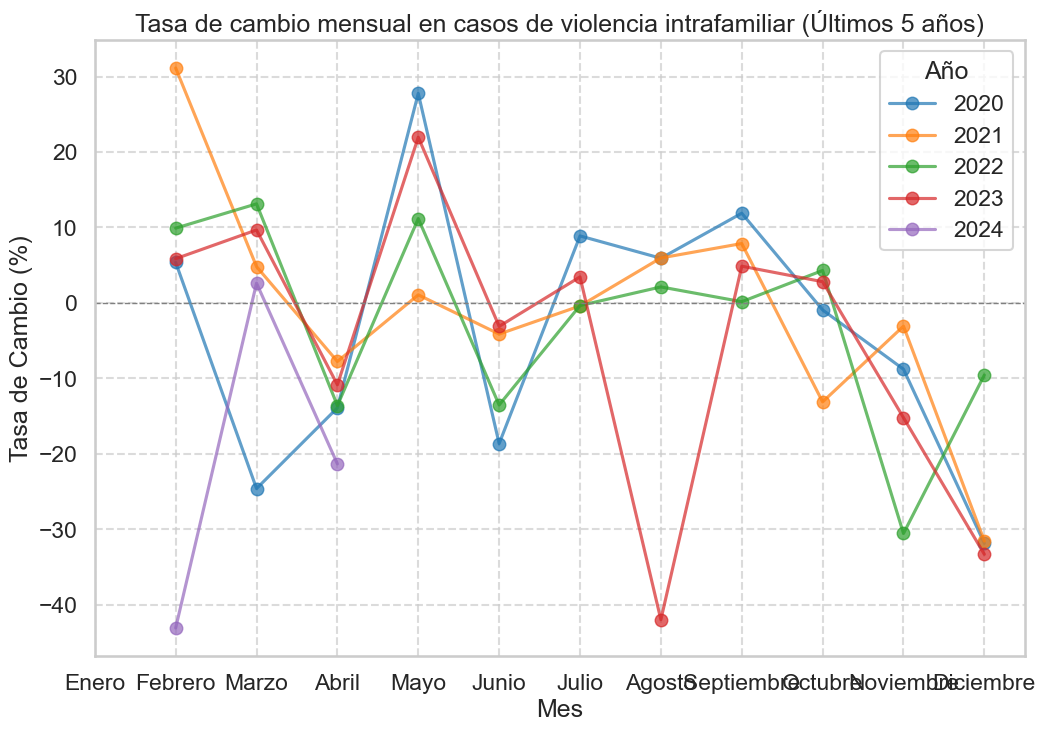

In [1162]:
# We get the last 5 years
año_max = df['FECHA HECHO'].dt.year.max()
años_filtrados = list(range(año_max - 4, año_max + 1))
df_filtrado = df[df['FECHA HECHO'].dt.year.isin(años_filtrados)]

# year and month filtering to get total monthly cases
df_filtrado['MES'] = df_filtrado['FECHA HECHO'].dt.month
casos_mensuales = df_filtrado.groupby(['AÑO', 'MES'])['CANTIDAD'].sum().reset_index()

# Calculus: monthly exchange rate
casos_mensuales['TASA_CAMBIO'] = (casos_mensuales.groupby('AÑO')['CANTIDAD'].pct_change() * 100).round(2)

# Graph
plt.figure(figsize=(12, 8))
for año in años_filtrados:
    datos_año = casos_mensuales[casos_mensuales['AÑO'] == año]
    plt.plot(datos_año['MES'], datos_año['TASA_CAMBIO'], marker='o', label=f'{año}', alpha=0.7)

# Graph properties
plt.title('Tasa de cambio mensual en casos de violencia intrafamiliar (Últimos 5 años)')
plt.xlabel('Mes')
plt.ylabel('Tasa de Cambio (%)')
plt.xticks(range(1, 13), labels=meses)
plt.axhline(0, color='gray', linestyle='--', linewidth=1) 
plt.legend(title="Año")
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()